In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Traindf=pd.read_csv('Big Data Mart Train.csv')
Traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
Traindf.shape

(8523, 12)

In [4]:
Traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
Testdf=pd.read_csv('Big Data Mart Test.csv')
Testdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
Testdf.shape

(5681, 11)

In [7]:
Traindf['source']='train'
Testdf['source']='test'
Testdf['Item_Outlet_Sales']=0
df=pd.concat([Traindf,Testdf])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
df.shape

(14204, 13)

In [9]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [10]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Outlet_Establishment_Year'], dtype='object'),
 dtype('float64'): Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object'),
 dtype('O'): Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
       dtype='object')}

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


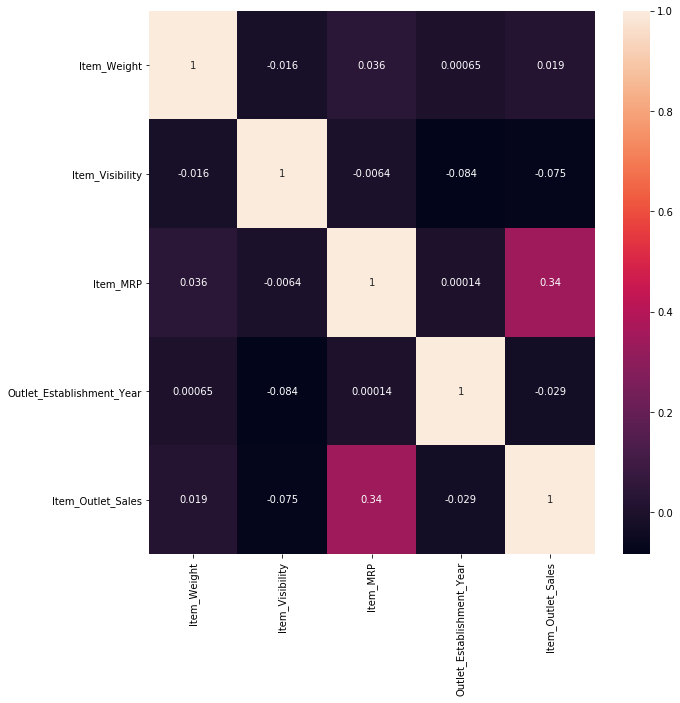

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [15]:
df_int=df.select_dtypes(include=[np.number])
df_int.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


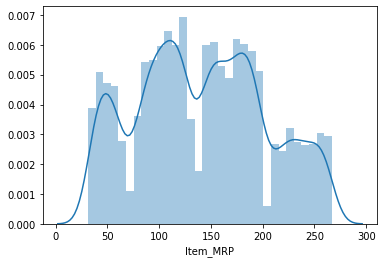

In [16]:

sns.distplot(df_int['Item_MRP'])

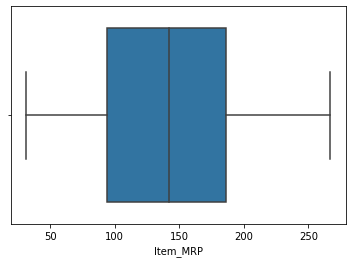

In [17]:
sns.boxplot(df_int['Item_MRP'])

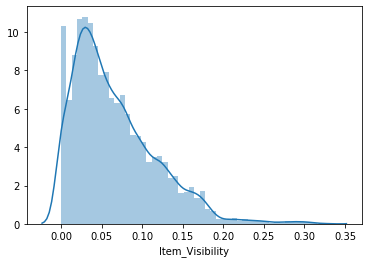

In [18]:
sns.distplot(df_int['Item_Visibility'])

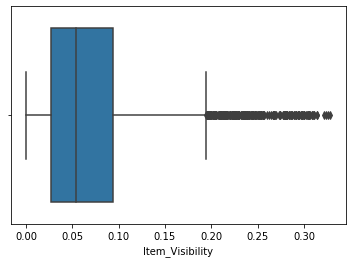

In [19]:
sns.boxplot(df_int['Item_Visibility'])

In [20]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [21]:
from scipy.stats import boxcox
df['Item_Visibility']=df['Item_Visibility']+1
df['Item_Visibility']=boxcox(df['Item_Visibility'],0)

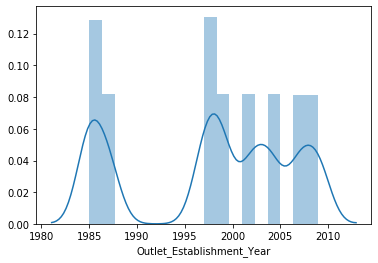

In [22]:
sns.distplot(df['Outlet_Establishment_Year'])

In [23]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [24]:
df['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [25]:
df['Outlet_Establishment_Year']=2009-df['Outlet_Establishment_Year']


In [26]:

df['Item_Weight'].isnull().sum()

2439

In [27]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()),inplace=True)

In [28]:
df_object=df.select_dtypes(include=[np.object])
df_object.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [29]:
for i in df_object:
    print(i)
    print(df_object[i].value_counts(),'\n')

Item_Identifier
FDZ48    10
FDW12    10
FDR02    10
FDQ31    10
FDK26    10
         ..
FDR51     7
NCW54     7
FDS22     7
FDM10     7
FDO33     7
Name: Item_Identifier, Length: 1559, dtype: int64 

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64 

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT0

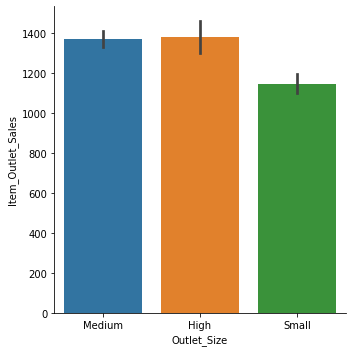

In [30]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().iloc[0],inplace=True)
sns.catplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,kind='bar')

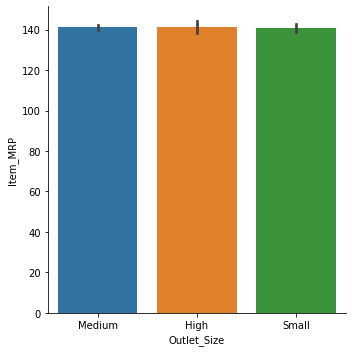

In [31]:
sns.catplot(x='Outlet_Size',y='Item_MRP',data=df,kind='bar')

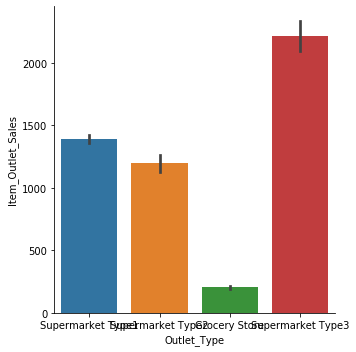

In [32]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,kind='bar')

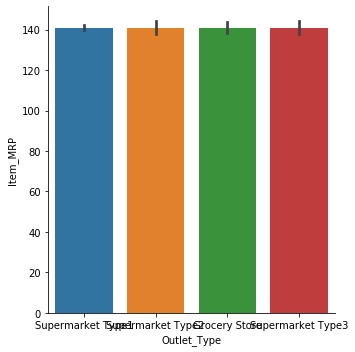

In [33]:
sns.catplot(x='Outlet_Type',y='Item_MRP',data=df,kind='bar')

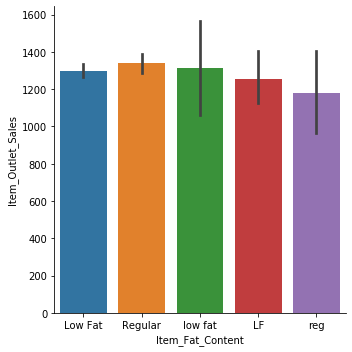

In [34]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df,kind='bar')

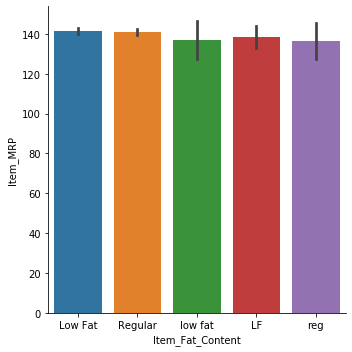

In [35]:
sns.catplot(x='Item_Fat_Content',y='Item_MRP',data=df,kind='bar')

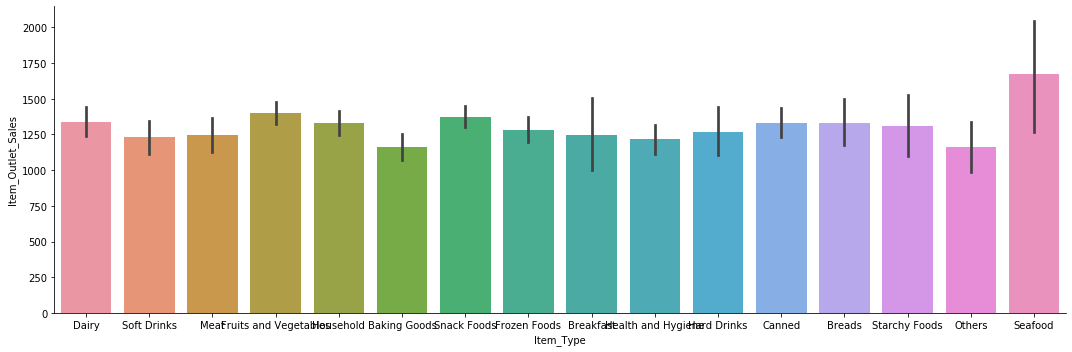

In [36]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',data=df,kind='bar',height=5,aspect=3)

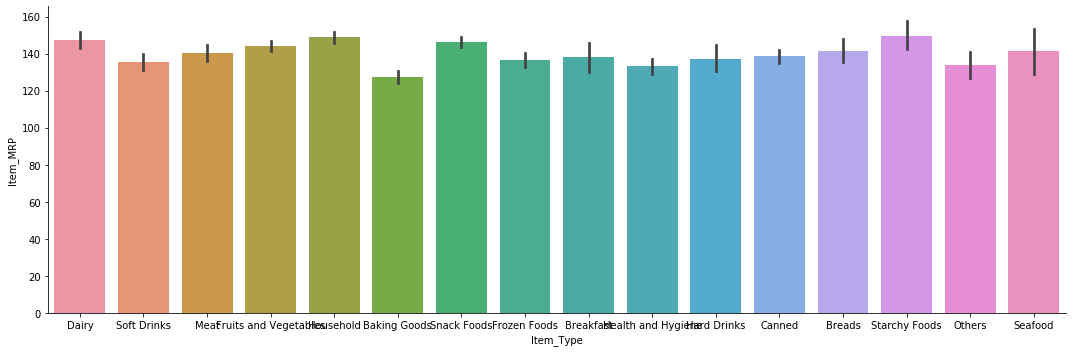

In [37]:
sns.catplot(x='Item_Type',y='Item_MRP',data=df,kind='bar',height=5,aspect=3)

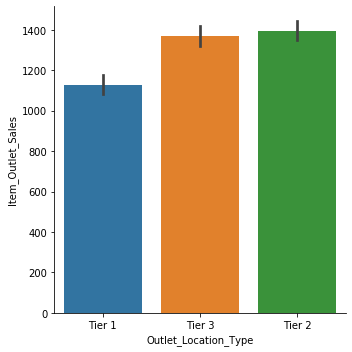

In [38]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,kind='bar')

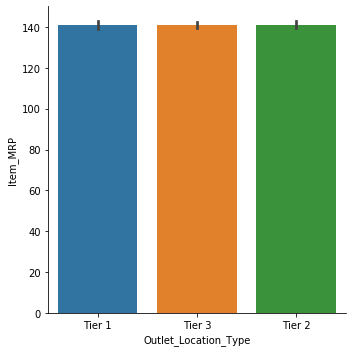

In [39]:
sns.catplot(x='Outlet_Location_Type',y='Item_MRP',data=df,kind='bar')

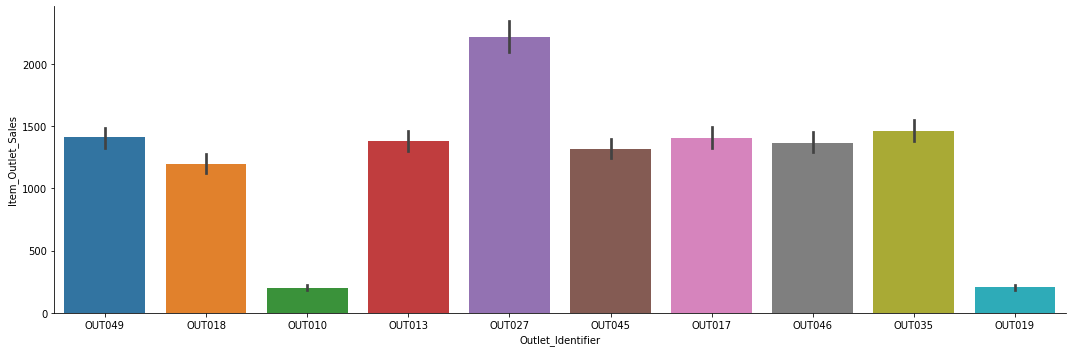

In [40]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df,kind='bar',height=5,aspect=3)

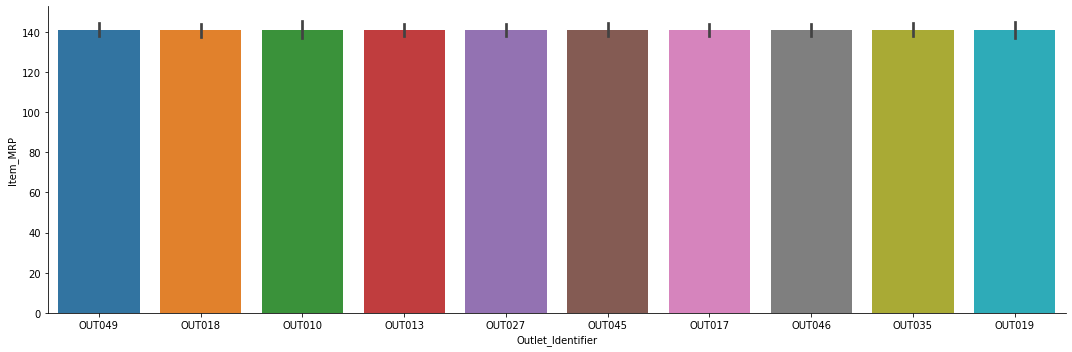

In [41]:
sns.catplot(x='Outlet_Identifier',y='Item_MRP',data=df,kind='bar',height=5,aspect=3)

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.015920,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019095,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016621,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052,train


In [43]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])

df['Item_Type']=le.fit_transform(df['Item_Type'])

df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,1,0.015920,4,249.8092,9,10,1,0,1,3735.1380,train
1,8,5.92,2,0.019095,14,48.2692,3,0,1,2,2,443.4228,train
2,662,17.50,1,0.016621,10,141.6180,9,10,1,0,1,2097.2700,train
3,1121,19.20,2,0.000000,6,182.0950,0,11,1,2,0,732.3800,train
4,1297,8.93,1,0.000000,9,53.8614,1,22,0,2,1,994.7052,train


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int32(7), int64(1), object(1)
me

In [48]:
TrainFinal=df.loc[df['source']=='train']
TrainFinal.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,1,0.015920,4,249.8092,9,10,1,0,1,3735.1380,train
1,8,5.92,2,0.019095,14,48.2692,3,0,1,2,2,443.4228,train
2,662,17.50,1,0.016621,10,141.6180,9,10,1,0,1,2097.2700,train
3,1121,19.20,2,0.000000,6,182.0950,0,11,1,2,0,732.3800,train
4,1297,8.93,1,0.000000,9,53.8614,1,22,0,2,1,994.7052,train


In [49]:
TrainFinal.drop(['source'],axis=1,inplace=True)

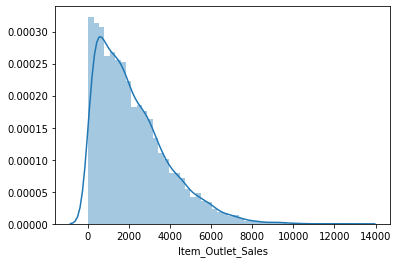

In [50]:
sns.distplot(TrainFinal['Item_Outlet_Sales'])

In [51]:
TrainFinal['Item_Outlet_Sales']=boxcox(TrainFinal['Item_Outlet_Sales'],0.5)

In [52]:
TrainFinal.shape

(8523, 12)

In [53]:
TestFinal=df.loc[df['source']=='test']
TestFinal.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,1114,20.750000,1,0.007536,13,107.8622,9,10,1,0,1,0.0,test
1,1078,8.300000,4,0.037708,4,87.3198,2,2,1,1,1,0.0,test
2,1420,14.600000,1,0.094924,11,241.7538,0,11,1,2,0,0.0,test
3,817,7.315000,1,0.015271,13,155.0340,2,2,1,1,1,0.0,test
4,1197,12.792854,2,0.112077,4,234.2300,5,24,1,2,3,0.0,test


In [54]:
TestFinal.drop(['source'],axis=1,inplace=True)
TestFinal.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [55]:

TestFinal.shape

(5681, 11)

In [56]:
x=TrainFinal.drop(['Item_Outlet_Sales'],axis=1)
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.015920,4,249.8092,9,10,1,0,1
1,8,5.92,2,0.019095,14,48.2692,3,0,1,2,2
2,662,17.50,1,0.016621,10,141.6180,9,10,1,0,1
3,1121,19.20,2,0.000000,6,182.0950,0,11,1,2,0
4,1297,8.93,1,0.000000,9,53.8614,1,22,0,2,1


In [57]:
x.shape

(8523, 11)

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [59]:
y=TrainFinal['Item_Outlet_Sales']
y.head()

0    120.231551
1     40.115213
2     89.591921
3     52.125040
4     61.077895
Name: Item_Outlet_Sales, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)
print(x_train.shape,x_test.shape)

(6818, 11) (1705, 11)


In [61]:
print(y_train.shape,y_test.shape)

(6818,) (1705,)


In [62]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor


In [64]:
conda install -c conda-forge xgboost

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [65]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=63)
ABR=AdaBoostRegressor(random_state=63)
RFR=RandomForestRegressor(random_state=63)
GBR=GradientBoostingRegressor(random_state=63)
XGR=XGBRegressor(random_state=63)

In [66]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [67]:
from sklearn.metrics import r2_score,mean_squared_error

Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.6006018052959137
Mean_Squared_Error = 535.0071399896173
Cross_Val_Score =  0.5690828049228348


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.5886259694082117
Mean_Squared_Error = 551.0491697038764
Cross_Val_Score =  0.5606486336230521


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.6005937936970436
Mean_Squared_Error = 535.017871792252
Cross_Val_Score =  0.5690833252324742


**********************

In [68]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.600602,535.007,0.569
1,Lasso,0.588626,551.049,0.561
2,Ridge,0.600594,535.018,0.569
3,ElasticNet,0.516076,648.232,0.495
4,DecisionTreeRegressor,0.327486,900.855,0.329
5,KNeighborsRegressor,0.608160,524.883,0.594
6,AdaBoostRegressor,0.663454,450.815,0.647
7,RandomForestRegressor,0.648474,470.881,0.635
8,GradientBoostingRegressor,0.687084,419.161,0.671
9,XGBRegressor,0.687002,419.272,0.672


In [69]:
from sklearn.externals import joblib
joblib.dump(XGR,'Model_BigMart.pkl')

['Model_BigMart.pkl']

In [70]:
model=joblib.load('Model_BigMart.pkl')

[12:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
